## Imports

In [1]:
import sys
import shutil
import os
import pandas as pd
from matplotlib import pyplot as plt
import random

PATH = "data/presidents/"
PATH_TRAIN = PATH+'train/'

if not os.path.exists(PATH_TRAIN):
    os.makedirs(PATH_TRAIN)

## Download Images

In [2]:
#!git clone https://github.com/hardikvasa/google-images-download.git
#shutil.move("google-images-download/google_images_download", "img_downloader")
#shutil.rmtree("google-images-download")
from img_downloader import google_images_download

In [3]:
# From http://textlists.info/history/list-of-all-presidents-of-the-united-states/

fn_presidents = open('misc/'+'us_presidents.txt', 'r') 
presidents = list(map(lambda x: x[:-1], fn_presidents.readlines()))
fn_presidents.close()

presidents = list(set(presidents))  # as Grover Cleveland a served 2 non-consequitive terms

In [4]:
def clean_pic_folder(directory):
    # Loops through images in a directory, and deletes those that couldn't be opened
    files = os.listdir(directory)
    counter = 0
    for f in files:
        currentfile = directory + f
        try: 
            img = plt.imread(currentfile)
        except OSError:
            counter += 1
            os.remove(currentfile)
            print('Removed: ' + currentfile)
    print(f'{counter} files removed in total.')

def download_img_list(key_list, dest_dir, n = 5, temp_dir = 'temp_img/'):
    
    def move_all(files, src_dir, dest_dir):
        for f in files:
            shutil.move(f'{src_dir}{f}', f'{dest_dir}{f}')
        return None
    
    os.makedirs(temp_dir)
    
    response = google_images_download.googleimagesdownload()
    download_options = {'limit':n, 'format':'jpg', 'output_directory':temp_dir, 'no_directory':True}
    
    file_list = []
    label_list = []

    for im in key_list:
    
        response.download({**download_options, **{'keywords':im}})
        
        clean_pic_folder(temp_dir)
    
        current_files = os.listdir(temp_dir)
        file_list = file_list + current_files
        label_list = label_list + [im] * len(current_files)
    
        move_all(current_files, temp_dir, dest_dir) 

    os.rmdir(temp_dir)  
    
    labels = pd.DataFrame({'id':file_list, 'label':label_list})
    
    return labels
    

In [5]:
labels = download_img_list(presidents, PATH_TRAIN, 5)


Item no.: 1 --> Item name = Thomas Jefferson
Evaluating...
Starting Download...
Completed Image ====> 1. 200px-thomas_jefferson_by_rembrandt_peale%2c_1800.jpg
Completed Image ====> 2. 200px-t_jefferson_by_charles_willson_peale_1791_2.jpg
Completed Image ====> 3. 02_thomas_jefferson_3x4.jpg
Completed Image ====> 4. hglkiimxydfigd1ph6pu.jpg
Completed Image ====> 5. jefferson-2-554x350.jpg

Errors: 0

0 files removed in total.

Item no.: 1 --> Item name = John Quincy Adams
Evaluating...
Starting Download...
Completed Image ====> 1. lossy-page1-220px-jqa_photo.tif.jpg
Completed Image ====> 2. john_quincy_adams%2c_by_john_singleton_copley.jpg
Completed Image ====> 3. jqa-npg-portrait-wr.jpeg
Completed Image ====> 4. 06_john_quincy_adams.jpg
Completed Image ====> 5. lnhjxpwm_400x400.jpg

Errors: 0

0 files removed in total.

Item no.: 1 --> Item name = William H. Harrison
Evaluating...
Starting Download...
Completed Image ====> 1. 220px-william_henry_harrison_daguerreotype_edit.jpg
Complete

/home/krisztian/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (90244544 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


0 files removed in total.

Item no.: 1 --> Item name = Lyndon B. Johnson
Evaluating...
Starting Download...
Completed Image ====> 1. 220px-37_lyndon_johnson_3x4.jpg
Completed Image ====> 2. 36_lyndon_b_johnson.jpg
Completed Image ====> 3. lyndon_b_johnson-h.jpeg
Completed Image ====> 4. 78243-004-23a03b3d.jpg
Completed Image ====> 5. lbj-color-p.jpeg

Errors: 0

0 files removed in total.

Item no.: 1 --> Item name = Herbert Hoover
Evaluating...
Starting Download...
Completed Image ====> 1. 220px-president_hoover_portrait.jpg
Completed Image ====> 2. 170px-hhoover_%28retouched%29.jpg
Completed Image ====> 3. ?url=https%3a%2f%2fmediadc.brightspotcdn.com%2f65%2f35%2ff6c27dfd826e79b90757a5b38bd9%2ff9faa0d47cd8698b58c04551e8e77e11.jpg.jpg
Completed Image ====> 4. 1930-17a.jpg
Completed Image ====> 5. post1.jpg

Errors: 0

0 files removed in total.

Item no.: 1 --> Item name = Gerald R. Ford
Evaluating...
Starting Download...
Completed Image ====> 1. uss_gerald_r._ford_%28cvn-78%29_underway_

Completed Image ====> 4. george-washington-9524786-1-402.jpg
Completed Image ====> 5. 200px-george_washington%2c_1776.jpg

Errors: 0

0 files removed in total.

Item no.: 1 --> Item name = Benjamin Harrison
Evaluating...
Starting Download...
Completed Image ====> 1. pach_brothers_-_benjamin_harrison.jpg
Completed Image ====> 2. benjamin_harrison-ab.jpeg
Completed Image ====> 3. benjamin-harrison-9329317-1-402.jpg
Completed Image ====> 4. 451_127716239087.jpg
Completed Image ====> 5. 220px-benjamin_harrison_c1850.jpg

Errors: 0

0 files removed in total.

Item no.: 1 --> Item name = James Monroe
Evaluating...
Starting Download...
Completed Image ====> 1. 220px-james_monroe_white_house_portrait_1819.jpg
Completed Image ====> 2. james_monroe_wikimedia_commonsjpg
Completed Image ====> 3. james_monroe-h.jpeg
Completed Image ====> 4. monroe_portrait.jpg
URLError on an image...trying next one... Error: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:777)>
Com

In [6]:
labels.groupby('label').size().sort_values().head(15)  # In case there are classes with few exmaples

label
Donald J. Trump        4
George W. Bush         4
Woodrow Wilson         4
Abraham Lincoln        5
Jimmy Carter           5
John Adams             5
John F. Kennedy        5
John Quincy Adams      5
John Tyler             5
Lyndon B. Johnson      5
Martin Van Buren       5
Millard Fillmore       5
Richard M. Nixon       5
Rutherford B. Hayes    5
Theodore Roosevelt     5
dtype: int64

In [7]:
labels.to_csv(PATH+'labels.csv')

## Look at examples

In [11]:
def imgShow(num = -1, directory = PATH_TRAIN):
    
    fns = os.listdir(directory)
    
    if num == -1:
        num = random.randint(0, len(fns)-1)
    img = plt.imread(directory + fns[num])
    return img

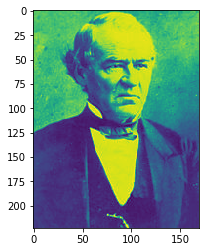

In [21]:
plt.imshow(imgShow(4))

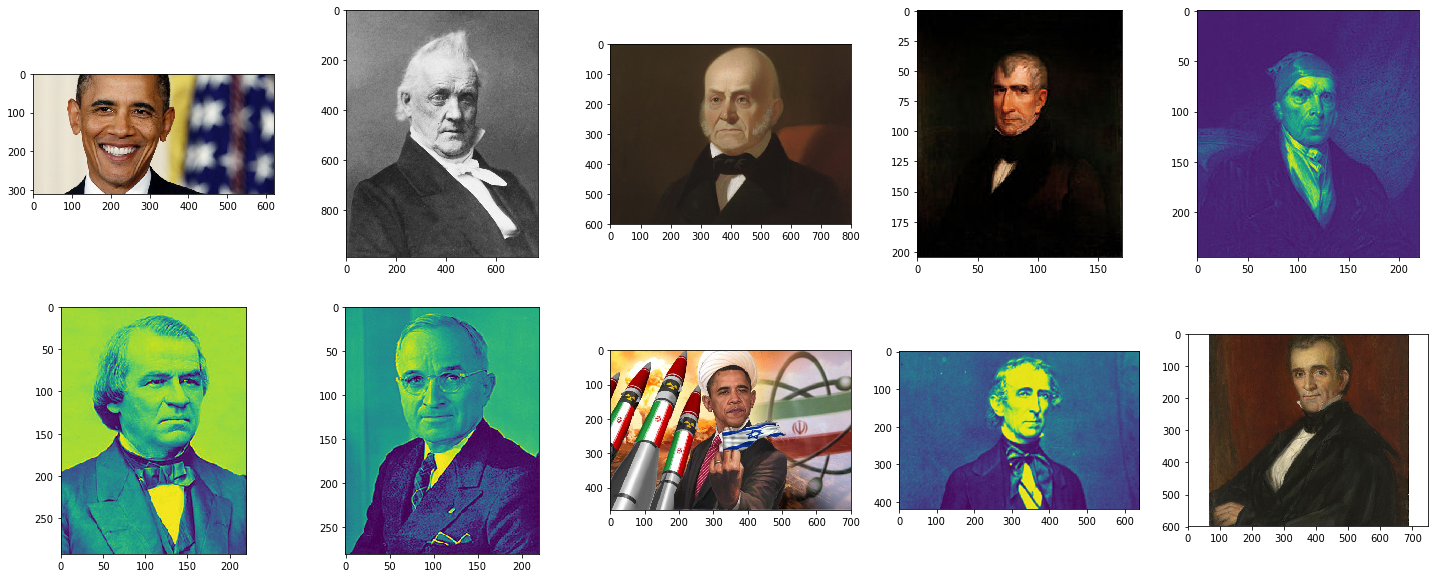

In [17]:
nrows, ncols = (2, 5)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize =(ncols * 5, nrows * 5))
for i in range(nrows):
    for j in range(ncols):
        axes[i, j].imshow(imgShow())